In [53]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.ndimage import uniform_filter1d

In [54]:
# Load Excel files
rg_pocket = pd.read_excel("gyrate.xlsx")
mdpout_descriptors = pd.read_excel("mdpout_descriptors.xlsx")
rmsd_pocket = pd.read_excel("rmsd_pocket.xlsx")
rmsf_pocket = pd.read_excel("rmsf_pocket.xlsx")
area_sasa = pd.read_excel("area.xlsx")

# RMSD

In [32]:
rmsd_pocket.tail(2)

,Time_ps,RMSD_nm
9999,99990,0.211474
10000,100000,0.199161


In [33]:
rmsd_pocket["Time_ps"].max()

100000

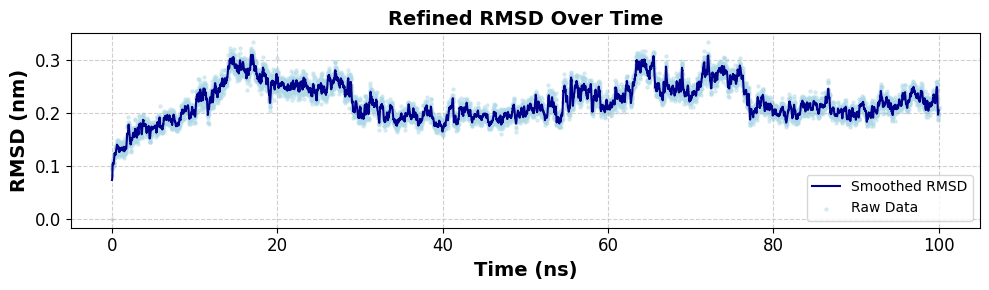

In [41]:
# Apply a moving average smoothing (window size = 10)
smoothed_rmsd = uniform_filter1d(rmsd_pocket["RMSD_nm"], size=10)

# Create the figure and plot
plt.figure(figsize=(10, 3))
plt.plot(rmsd_pocket["Time_ns"], smoothed_rmsd, linestyle='-', color='darkblue', label="Smoothed RMSD")
plt.scatter(rmsd_pocket["Time_ns"], rmsd_pocket["RMSD_nm"], color="lightblue", alpha=0.4, label="Raw Data", s=5)

# Labels and title
plt.xlabel("Time (ns)",fontsize=14, fontweight="bold")
plt.ylabel("RMSD (nm)", fontsize=14, fontweight="bold")
plt.title("Refined RMSD Over Time", fontsize=14, fontweight="bold")
plt.legend()
plt.grid(True)
plt.tight_layout()

# Grid and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Improve layout
plt.tight_layout()


# Show the plot
plt.show()

# RMSF

In [29]:
rmsf_pocket.head()

,Residue,RMSF
0,50,0.1261
1,51,0.0792
2,52,0.0701
3,53,0.0759
4,54,0.0882


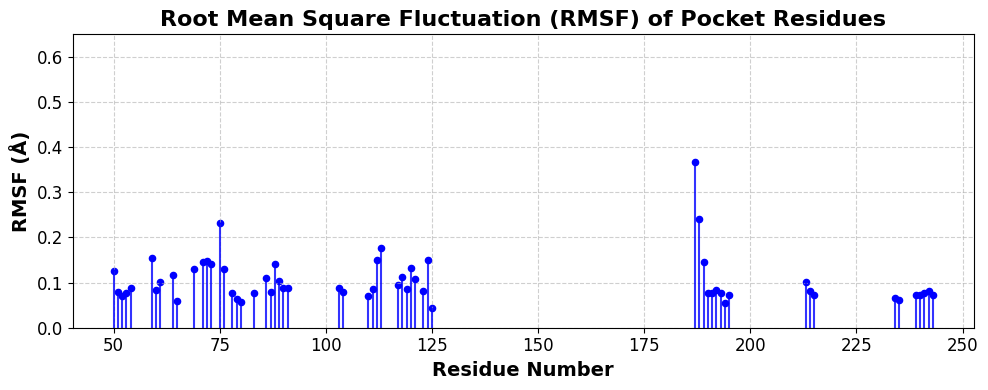

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load RMSF data
rmsf_pocket = pd.read_excel("rmsf_pocket.xlsx", engine="openpyxl")

# Create figure
plt.figure(figsize=(10, 4))

# Plot RMSF with "sticks" effect (vertical lines from x-axis)
plt.vlines(rmsf_pocket["Residue"], ymin=0, ymax=rmsf_pocket["RMSF"], color='b', linewidth=1.5, alpha=0.8)
plt.scatter(rmsf_pocket["Residue"], rmsf_pocket["RMSF"], color='b', s=20, label="RMSF Data")

# Labels and title
plt.xlabel("Residue Number", fontsize=14, fontweight="bold")
plt.ylabel("RMSF (Å)", fontsize=14, fontweight="bold")
plt.title("Root Mean Square Fluctuation (RMSF) of Pocket Residues", fontsize=16, fontweight="bold")

# Grid and ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Set Y-axis range from 65 to 95
plt.ylim(0, 0.65)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


In [62]:
high_rmsf_residues = rmsf_pocket[rmsf_pocket["RMSF"] > 0.15]

# Display the filtered DataFrame
print(high_rmsf_residues)

    Residue    RMSF
5        59  0.1545
14       75  0.2320
31      113  0.1765
40      187  0.3680
41      188  0.2404


# SASA

In [43]:
area_sasa.head()

,Time_ns,Area (nm\S2\N)
0,0.00,77.921
1,0.01,79.080
2,0.02,77.751
3,0.03,78.908
4,0.04,77.288


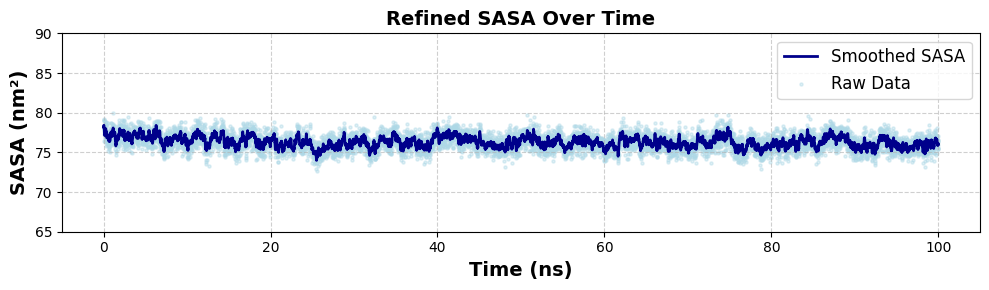

In [48]:
# Rename the column dynamically to avoid special character issues
correct_column_name = area_sasa.columns[1]  # Selects the second column dynamically
area_sasa.rename(columns={correct_column_name: "SASA"}, inplace=True)

# Apply a moving average smoothing (window size = 10)
smoothed_sasa = uniform_filter1d(area_sasa["SASA"], size=10)

# Create the figure and plot
plt.figure(figsize=(10, 3))
plt.plot(area_sasa["Time_ns"], smoothed_sasa, linestyle='-', color='darkblue', linewidth=2, label="Smoothed SASA")
plt.scatter(area_sasa["Time_ns"], area_sasa["SASA"], color="lightblue", alpha=0.4, label="Raw Data", s=5)

# Labels and title
plt.xlabel("Time (ns)", fontsize=14, fontweight="bold")
plt.ylabel("SASA (nm²)", fontsize=14, fontweight="bold")
plt.title("Refined SASA Over Time", fontsize=14, fontweight="bold")

# Grid and legend
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Set Y-axis range from 65 to 95
plt.ylim(65, 90)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()


# Rg (pocket)

In [49]:
gyrate.head(2)

,Time (ps),Rg_pocket
0,0,1.56954
1,10,1.57512


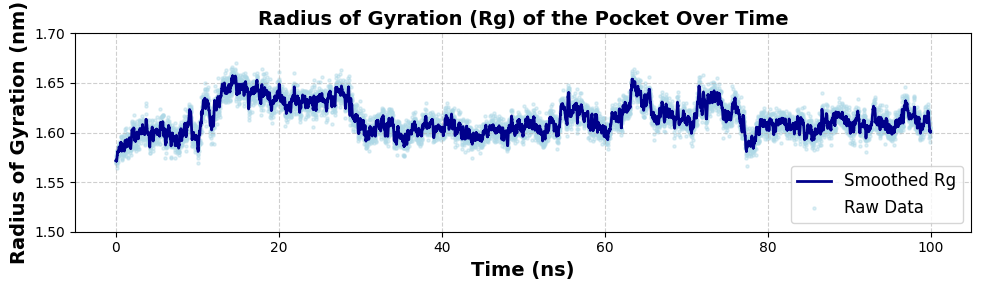

In [61]:
# Convert Time from ps to ns
rg_pocket["Time_ns"] = rg_pocket["Time (ps)"] / 1000  # Convert picoseconds to nanoseconds

# Apply a moving average smoothing (window size = 10)
smoothed_rg = uniform_filter1d(rg_pocket["Rg_pocket"], size=10)

# Create the figure and plot
plt.figure(figsize=(10, 3))
plt.plot(rg_pocket["Time_ns"], smoothed_rg, linestyle='-', color='darkblue', linewidth=2, label="Smoothed Rg")
plt.scatter(rg_pocket["Time_ns"], rg_pocket["Rg_pocket"], color="lightblue", alpha=0.4, label="Raw Data", s=5)

# Labels and title
plt.xlabel("Time (ns)", fontsize=14, fontweight="bold")
plt.ylabel("Radius of Gyration (nm)", fontsize=14, fontweight="bold")
plt.title("Radius of Gyration (Rg) of the Pocket Over Time", fontsize=14, fontweight="bold")

# Grid and legend
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Set Y-axis range from 65 to 95
plt.ylim(1.50, 1.70)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()

# MDPocket volume

In [55]:
mdpout_descriptors.head()

,snapshot,pock_volume,pock_asa,pock_pol_asa,pock_apol_asa,pock_asa22,pock_pol_asa22,pock_apol_asa22,nb_AS,mean_as_ray,...,LEU,LYS,MET,PHE,PRO,SER,THR,TRP,TYR,VAL
0,1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,...,0,0,0,0,0,0,0,0,0,0
1,2,29.65,33.57,22.70,10.87,23.32,17.59,5.73,1,3.54,...,0,2,0,0,0,1,0,0,0,0
2,3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,...,0,0,0,0,0,0,0,0,0,0
3,4,93.67,71.69,36.67,35.02,25.00,19.27,5.73,5,3.71,...,1,1,0,0,0,0,0,0,0,0
4,5,100.42,71.93,52.61,19.32,46.45,33.07,13.38,5,4.25,...,0,0,0,0,0,1,0,0,0,0


In [57]:
# Add Time (ns) column (each step = 100 ps = 0.1 ns)
mdpout_descriptors["Time_ns"] = (mdpout_descriptors["snapshot"] - 1) * 0.1 

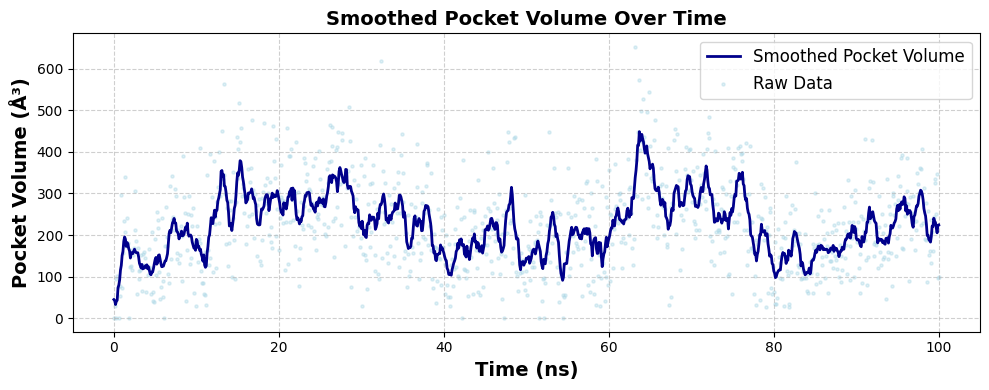

In [60]:
# Apply a moving average smoothing (window size = 10)
mdpout_descriptors["Smoothed_pock_volume"] = uniform_filter1d(mdpout_descriptors["pock_volume"], size=10)

# Create the figure and plot
plt.figure(figsize=(10, 4))
plt.plot(mdpout_descriptors["Time_ns"], mdpout_descriptors["Smoothed_pock_volume"], linestyle='-', color='darkblue', linewidth=2, label="Smoothed Pocket Volume")
plt.scatter(mdpout_descriptors["Time_ns"], mdpout_descriptors["pock_volume"], color="lightblue", alpha=0.4, label="Raw Data", s=5)

# Labels and title
plt.xlabel("Time (ns)", fontsize=14, fontweight="bold")
plt.ylabel("Pocket Volume (Å³)", fontsize=14, fontweight="bold")
plt.title("Smoothed Pocket Volume Over Time", fontsize=14, fontweight="bold")

# Grid and legend
plt.legend(fontsize=12)
plt.grid(True, linestyle="--", alpha=0.6)

# Improve layout
plt.tight_layout()

# Show the plot
plt.show()